<a href="https://colab.research.google.com/github/madhurapi/Bank-Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import 'Numpy' 
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 


In [ ]:
file = pd.read_csv("Bank Customer Churn Prediction.csv")

In [ ]:
df = pd.DataFrame(file)

In [ ]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,15647311,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,15619304,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,15701354,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,15737888,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.000000,2,1,0,96270.640000,0
9996,15569892,516,France,Male,35,10,57369.610000,1,1,1,101699.770000,0
9997,15584532,709,France,Female,36,7,0.000000,1,0,1,42085.580000,1
9998,15682355,772,Germany,Male,42,3,75075.310000,2,1,0,92888.520000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### 10000 data entries
### no null values
### 12 columns
### churn: target variable, 1== True, 0 ==False

# Visualisation

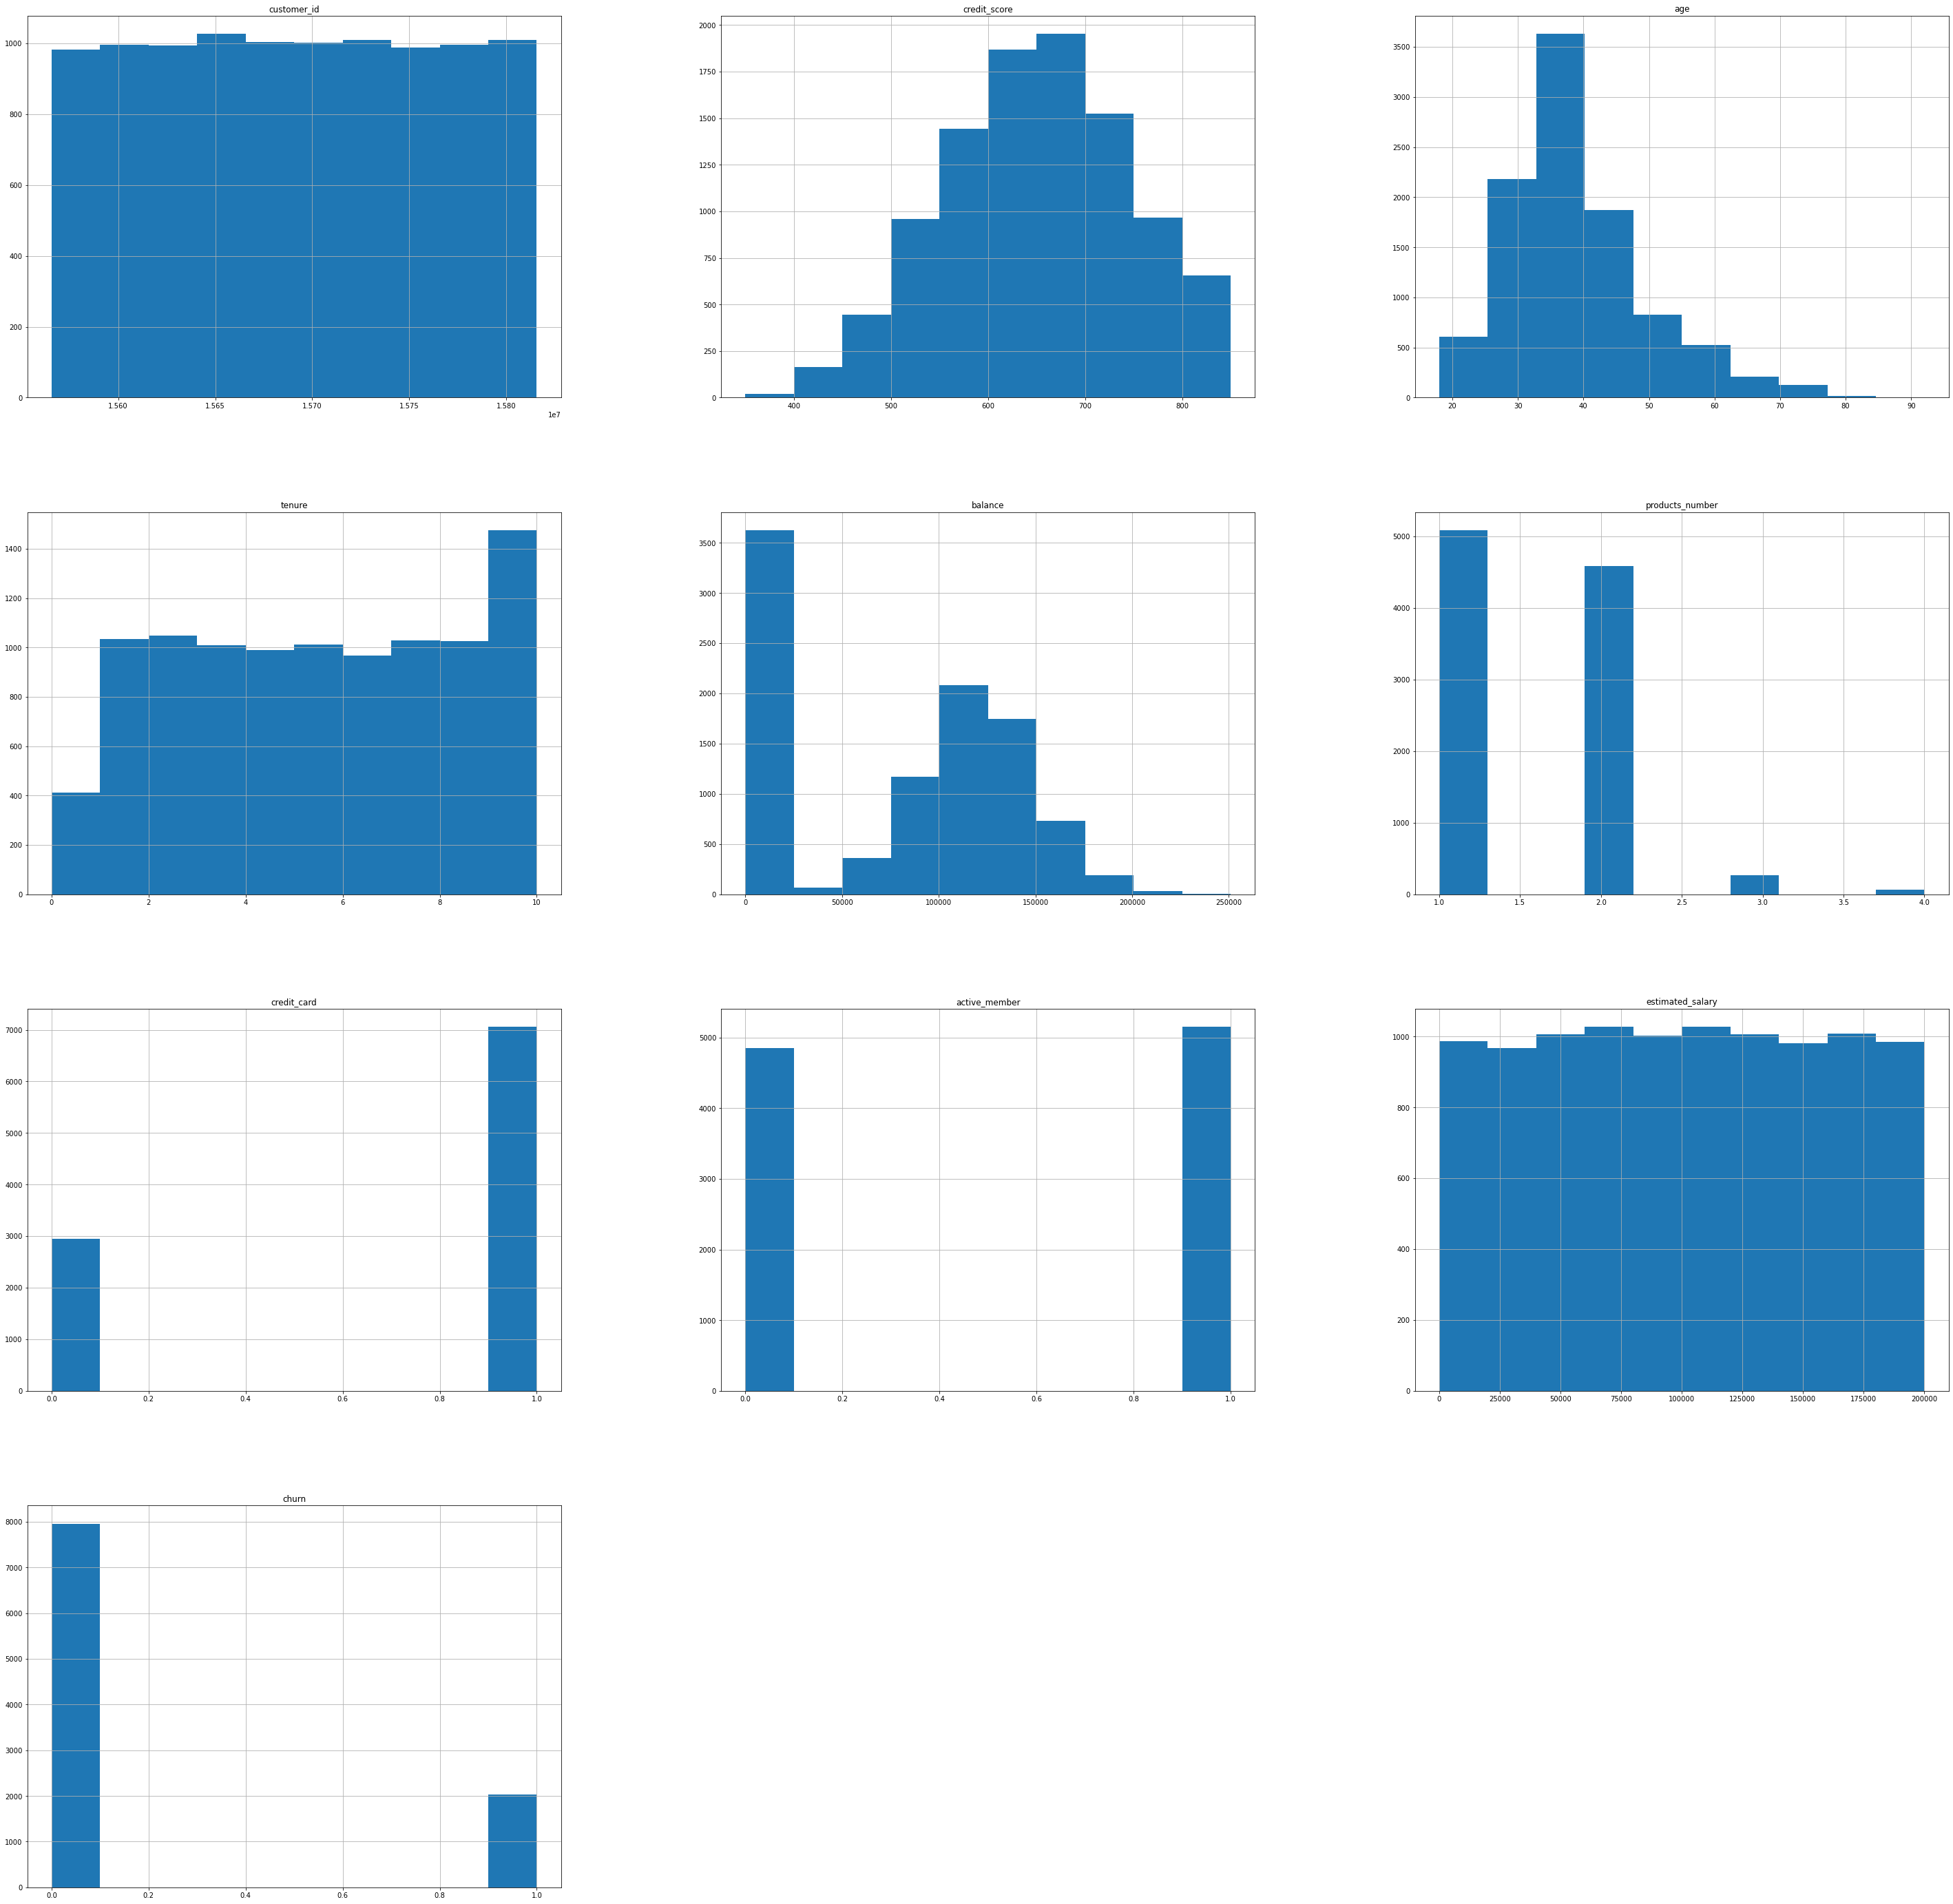

In [ ]:
# set the plot size
plt.rcParams['figure.figsize']=(50,50)
#numeric column datatype
df_numeric = df.select_dtypes(include=np.number)
df_numeric.hist()
# show plot
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

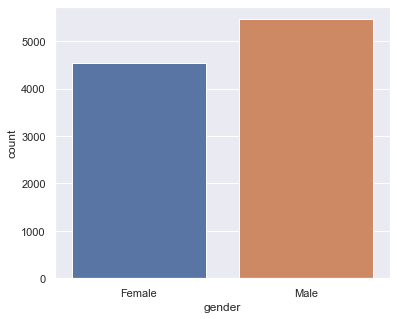

In [ ]:
sns.set(rc={"figure.figsize":(6, 5)})
sns.countplot(df['gender'])

<AxesSubplot:xlabel='country', ylabel='count'>

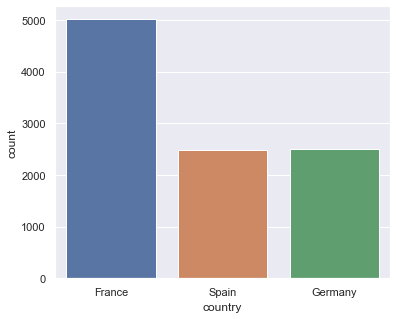

In [ ]:
sns.set(rc={"figure.figsize":(6, 5)})
sns.countplot(df['country'])

# Key Findings


### 1. Tenure is from 0 to 10 hence the collected data is for 10 years
### 2. credit card = 0 & 1 ;; Use of credit card:7000 and not using credit card : 3000
### 3. Churn : for (0 : 8000) and (for 1: 2000) hence target variable is imbalanced, either to perform oversampling or            undersampling
### 4. Credit score is normally distributed. mode = 650 for near abot 2000 people
### 5. Balance : Nearly 4000 people have zero balance in their account and have average balance maintained by                others is arround 11000(11 lac) for 2000 people for remaing are litle more and other 2000 are less than that.
### 6. Active Member : Non- active and active are almost equal in number.
### 7.Estimated salary is uniformly distributed. Range from 25k to 20L is salary band. each slab have approx 1000              to 1500 customers among 8 portions. Hence data represents all sets of class of community having diff                      salary. min is 11/-
### 8. Products offered to customers from  1 to 4, many of them avail any 2 of them nearly 5000 and 4500 for 1 and             2 resp. and remaining are 500 : (300 :3) & (200:4)
### 9. Age 18 to 85. 30 to 45 the number of counts are high. Age can be grouped into three from 18 to 30,30 to                    45,45 to 85.

In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# checking for outliers

<AxesSubplot:>

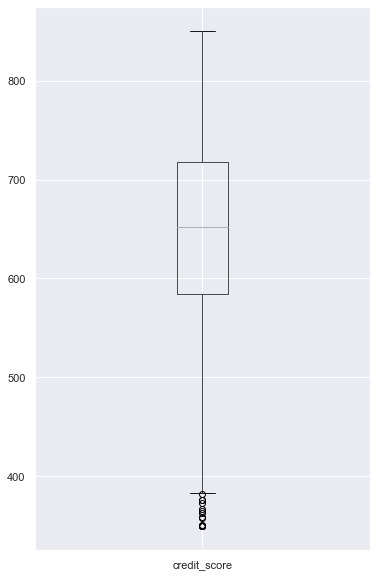

In [ ]:
sns.set(rc={"figure.figsize":(6, 10)})
df.boxplot('credit_score')

<AxesSubplot:>

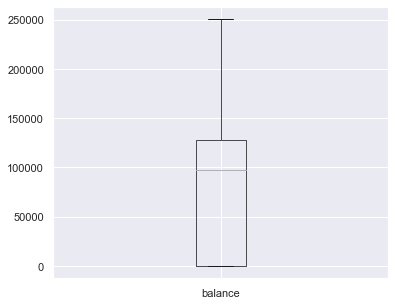

In [ ]:
sns.set(rc={"figure.figsize":(6, 5)})
df.boxplot('balance')

<AxesSubplot:>

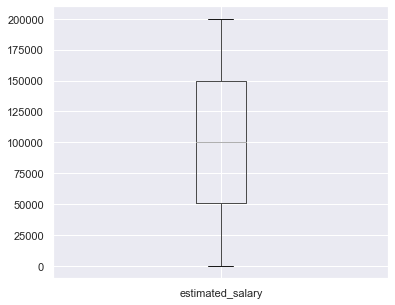

In [ ]:
sns.set(rc={"figure.figsize":(6, 5)})
df.boxplot('estimated_salary')

# Few Questions?

### 1. Does all the non active member are churn?
### 2. How many of non active member churned
### 3. Customers having zero balance are very less paid? or highly paid have also not maintained balance?
### 4. why the customer has low credit score , credit ustilisation is more than 80% of the card limit them the credit                score will be affected. Hence, here in, the bank can look into and offer an upgradation of card without                        charges or minimal charges to retain the customer.
### 5. now these are salaried account hence zero balance is preferred but if the account is non salaried then is                     bank giving any other privileges to retain.
### 6. why all the products offered by bank isnot availed by all customers?
### 7. are those rest products are only availed by highly salaried people?
### 8. customers who all used all the services and products are still the customers are not?
### 9. why from germany and spain the customers are less ? its a international bank dataset why is the customer                 count less in these two countries.
### 10. is customer aged >60 is the old customer or just for sake of deposit the customer has opened the account?
### 11. if a customer has tenure of 10 what is his age? 
### 12. is a highly paid or less paid person is active ?


# ANSWERS TO ABOVE

In [ ]:
## 1. Does all the non active member are churn?

In [ ]:
df_nonactive = df[((df['active_member'] == 0))]

In [ ]:
pivot_1 = df_nonactive.pivot_table(index =['active_member'],
                       values =['churn'],
                       aggfunc ='sum')
pivot_1

,churn
active_member,
0,1302


In [ ]:
df_nonactive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 2 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       4849 non-null   int64  
 1   credit_score      4849 non-null   int64  
 2   country           4849 non-null   object 
 3   gender            4849 non-null   object 
 4   age               4849 non-null   int64  
 5   tenure            4849 non-null   int64  
 6   balance           4849 non-null   float64
 7   products_number   4849 non-null   int64  
 8   credit_card       4849 non-null   int64  
 9   active_member     4849 non-null   int64  
 10  estimated_salary  4849 non-null   float64
 11  churn             4849 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 492.5+ KB


In [ ]:
# No all non active members didnot get churned

In [ ]:
# 2. How many of non active member churned
# Out of total 4849 nonactive members 1302 members got churned. 26 % of total non active mmber got churned

In [ ]:
# 3. Customers having zero balance are very less paid? or highly paid have also not maintained balance?

In [ ]:
df_balance_0 = df[((df['balance'] == 0))]

In [ ]:
df_balance_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 9997
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       3617 non-null   int64  
 1   credit_score      3617 non-null   int64  
 2   country           3617 non-null   object 
 3   gender            3617 non-null   object 
 4   age               3617 non-null   int64  
 5   tenure            3617 non-null   int64  
 6   balance           3617 non-null   float64
 7   products_number   3617 non-null   int64  
 8   credit_card       3617 non-null   int64  
 9   active_member     3617 non-null   int64  
 10  estimated_salary  3617 non-null   float64
 11  churn             3617 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 367.4+ KB


In [ ]:
pivot_2 = df_balance_0.pivot_table(index =['active_member'],
                       values =['churn'],
                       aggfunc ='sum')
pivot_2

,churn
active_member,
0,320
1,180


In [ ]:
# 3617 maintained zero balance.  36% of total customers have zero balance. 
# Out of 3617, 500 got churned. 13.8% who maintained zero balance got churned. (out of 500, 320 were non active.)
# theres no data how long they have been keeping a balance zero.

In [ ]:
df_balance_0_less_salary = df_balance_0[((df_balance_0['estimated_salary'] < 51002.110000))]

In [ ]:
# 25% of total customers estimated salary was found be 50000,
# hence the less salaried person who are maintaining zero balance are 927 in number.
# 25.16% are less salaried of zero balance maintaining customers (927/3617)
# 0.09% of total customers who maintain zero balance are less salaried.(927/10000)
# 2690 are highly paid with maintaining zero balance.(3617-927). (2690/3617)74.37 are well salaried.
# 0.269 ~~ 27% of total customes who are well salaried are still maintaining zero balance.(2690/10000)

In [ ]:
df_balance_0_less_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 6 to 9997
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       927 non-null    int64  
 1   credit_score      927 non-null    int64  
 2   country           927 non-null    object 
 3   gender            927 non-null    object 
 4   age               927 non-null    int64  
 5   tenure            927 non-null    int64  
 6   balance           927 non-null    float64
 7   products_number   927 non-null    int64  
 8   credit_card       927 non-null    int64  
 9   active_member     927 non-null    int64  
 10  estimated_salary  927 non-null    float64
 11  churn             927 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 94.1+ KB


In [ ]:
pivot_3 = df_balance_0_less_salary.pivot_table(index =['active_member'],
                       values =['churn'],
                       aggfunc ='sum')
pivot_3

,churn
active_member,
0,82
1,39


In [ ]:
# from less salaried persons 82 were nonactive who got churned.
# 82/927 = 0.088 , 8.8% were non active from less salaried
# 0.82 % from total customer count

In [ ]:
# 4. why the customer has low credit score , credit ustilisation is more than 80% of the card limit them the credit score will be affected.
# Hence, here in,the bank can look into and offer an upgradation of card without charges 
# or minimal charges to retain the customer.

In [ ]:
df_low_creditscore = df[((df['credit_score'] <=650))]

In [ ]:
df_low_creditscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4937 entries, 0 to 9996
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       4937 non-null   int64  
 1   credit_score      4937 non-null   int64  
 2   country           4937 non-null   object 
 3   gender            4937 non-null   object 
 4   age               4937 non-null   int64  
 5   tenure            4937 non-null   int64  
 6   balance           4937 non-null   float64
 7   products_number   4937 non-null   int64  
 8   credit_card       4937 non-null   int64  
 9   active_member     4937 non-null   int64  
 10  estimated_salary  4937 non-null   float64
 11  churn             4937 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 501.4+ KB


In [ ]:
pivot_4 = df_low_creditscore.pivot_table(index =['credit_card'],
                       values =['credit_score'],
                       aggfunc ='mean')
pivot_4

,credit_score
credit_card,
0,570.715577
1,571.331523


In [ ]:
df_low_creditscore_creditcard_1 = df_low_creditscore[((df_low_creditscore['credit_card'] == 1))]

In [ ]:
df_low_creditscore_creditcard_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3499 entries, 0 to 9996
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       3499 non-null   int64  
 1   credit_score      3499 non-null   int64  
 2   country           3499 non-null   object 
 3   gender            3499 non-null   object 
 4   age               3499 non-null   int64  
 5   tenure            3499 non-null   int64  
 6   balance           3499 non-null   float64
 7   products_number   3499 non-null   int64  
 8   credit_card       3499 non-null   int64  
 9   active_member     3499 non-null   int64  
 10  estimated_salary  3499 non-null   float64
 11  churn             3499 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 355.4+ KB


In [ ]:
# 4937 has low credit score out that 3499 are using credit cards
# (3499/4937)70% are using credit card, hence the usage data of credit card, default payment, the card limit data if it is exceeding required.
# 21% (743/3499) of total low credit score and using credit card got churned. not to further loose these 2756 customers offers can be given.

In [ ]:
pivot_5 = df_low_creditscore_creditcard_1.pivot_table(index =['churn'],
                       values =['credit_card'],
                       aggfunc ='sum')
pivot_5

,credit_card
churn,
0,2756
1,743


In [ ]:
# customers with or without credit card the credit score is same.
# 

In [ ]:
# 5. now these are salaried account
# hence zero balance is preferred but if the account is non salaried then is bank giving any other privileges to retain.
# no data to answer this.

In [ ]:
# 6. why all the products offered by bank isnot availed by all customers?
# if we consider the type of product numbering then 1 and 2 is used widely and 3 and 4th is used less
# or if we consider the number of products offered by the bank then it is 2 products are used more all 3 rd and 4th is not used much.

In [ ]:
df_product_number_3n4 = df[((df['products_number'] >= 3))]

In [ ]:
df_product_number_3n4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 2 to 9895
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       326 non-null    int64  
 1   credit_score      326 non-null    int64  
 2   country           326 non-null    object 
 3   gender            326 non-null    object 
 4   age               326 non-null    int64  
 5   tenure            326 non-null    int64  
 6   balance           326 non-null    float64
 7   products_number   326 non-null    int64  
 8   credit_card       326 non-null    int64  
 9   active_member     326 non-null    int64  
 10  estimated_salary  326 non-null    float64
 11  churn             326 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 33.1+ KB


In [ ]:
pivot_6 = df_product_number_3n4.pivot_table(index =['churn','products_number'],
                       values =['credit_card'],
                       aggfunc ='sum')
pivot_6

credit_card
churn products_number             
0     3                         34
1     3                        156
      4                         41

In [ ]:
df_product_number_3n4.products_number.value_counts()

3    266
4     60
Name: products_number, dtype: int64

In [ ]:
df_product_number_3n4.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,15694947.625767,649.113497,43.653374,5.058282,78821.789571,3.184049,0.708589,0.435583,104400.141503,0.858896
std,73337.642601,96.200413,10.148108,2.889713,62283.191084,0.388120,0.455111,0.496595,55759.764947,0.348664
min,15566312.000000,358.000000,21.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3440.470000,0.000000
25%,15633533.250000,587.250000,37.000000,3.000000,0.000000,3.000000,0.000000,0.000000,64344.800000,1.000000
50%,15692261.000000,650.000000,43.000000,5.000000,101628.675000,3.000000,1.000000,0.000000,103874.670000,1.000000
75%,15757703.000000,711.000000,50.000000,8.000000,128743.610000,3.000000,1.000000,1.000000,151150.967500,1.000000
max,15815490.000000,850.000000,77.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199357.240000,1.000000


In [ ]:
df_product_number_3n4.active_member.value_counts()

0    184
1    142
Name: active_member, dtype: int64

In [ ]:
df_product_number_3n4.churn.value_counts()

1    280
0     46
Name: churn, dtype: int64

In [ ]:
# 326 customers uses all 3 and 4 products.
# 60 customers uses all four products.
# all products availed at the age of 21
# services availed by the customers are having less slary of 64k (25% of customers)
# even availing all the services nearly about 3 to 4, 184 are non active (56% are non active means the products offered are not that great to retain customers)
# total 60 customers are availing all the 4 products but still 20 of them got churned.. and the customers using all the 3 products almost all got churned.
#(280/326) 85.88% of customers using all 3 and 4 products are still not statisfied.. either the 3rd or 4th products offered are not that great.
# 2.8% of customers got churned even using all the products.
# may be the bank has many products but customers using all 4 services are just 60 ,, it seems even more services availed number is very niche.
# the products are not reached to the customers properly.
# 

In [ ]:
# 7. are those rest products are only availed by highly salaried people?
# no the mean salary of these customers is found be 1lac hence it is not that it is availed by high salaried people

In [ ]:
# 8. customers who all used all the services and products are still the customers are not?
# answered above

In [ ]:
# 9. why from germany and spain the customers are less ? 
# its a international bank dataset why is the customer count less in these two countries.

In [ ]:
# 10. is customer aged >60 is the old customer or just for sake of deposit the customer has opened the account?

In [ ]:
df_agemorethan60 = df[((df['age'] > 60))]

In [ ]:
df_agemorethan60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 42 to 9936
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       464 non-null    int64  
 1   credit_score      464 non-null    int64  
 2   country           464 non-null    object 
 3   gender            464 non-null    object 
 4   age               464 non-null    int64  
 5   tenure            464 non-null    int64  
 6   balance           464 non-null    float64
 7   products_number   464 non-null    int64  
 8   credit_card       464 non-null    int64  
 9   active_member     464 non-null    int64  
 10  estimated_salary  464 non-null    float64
 11  churn             464 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 47.1+ KB


In [ ]:
df_agemorethan60.age.value_counts().sum()

464

In [ ]:
df_agemorethan60.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,15690936.719828,654.549569,67.510776,4.905172,75742.596401,1.508621,0.706897,0.808190,98126.179009,0.247845
std,72428.231711,96.782770,5.645378,2.973543,61723.147097,0.591454,0.455677,0.394150,57542.868774,0.432227
min,15566689.000000,408.000000,61.000000,0.000000,0.000000,1.000000,0.000000,0.000000,502.700000,0.000000
25%,15632642.500000,592.000000,63.000000,2.000000,0.000000,1.000000,0.000000,1.000000,48489.515000,0.000000
50%,15684640.500000,652.500000,66.000000,5.000000,96557.230000,1.000000,1.000000,1.000000,96301.055000,0.000000
75%,15756300.500000,723.250000,71.000000,7.250000,126681.105000,2.000000,1.000000,1.000000,147057.932500,0.000000
max,15815626.000000,850.000000,92.000000,10.000000,187013.130000,4.000000,1.000000,1.000000,199493.380000,1.000000


In [ ]:
#no such data can be interpretted

In [ ]:
# 11. if a customer has tenure of 10 what is his age?

In [ ]:
df_tenure10 = df[((df['tenure'] == 10))]

In [ ]:
df_tenure10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 12 to 9996
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       490 non-null    int64  
 1   credit_score      490 non-null    int64  
 2   country           490 non-null    object 
 3   gender            490 non-null    object 
 4   age               490 non-null    int64  
 5   tenure            490 non-null    int64  
 6   balance           490 non-null    float64
 7   products_number   490 non-null    int64  
 8   credit_card       490 non-null    int64  
 9   active_member     490 non-null    int64  
 10  estimated_salary  490 non-null    float64
 11  churn             490 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 49.8+ KB


In [ ]:
df_tenure10.age.value_counts()

39    24
37    23
40    23
38    22
34    21
41    21
32    21
36    20
29    19
35    18
33    18
42    16
31    16
43    16
30    15
46    14
44    14
47    13
48    10
23    10
49    10
28    10
45     9
51     9
25     9
24     8
26     8
27     8
55     5
22     5
53     5
50     5
62     5
52     4
56     3
21     3
60     3
69     2
64     2
67     2
63     2
76     2
71     2
18     2
85     1
88     1
74     1
79     1
58     1
61     1
65     1
77     1
54     1
57     1
75     1
20     1
59     1
Name: age, dtype: int64

In [ ]:
# many of them are of salaried from different age group hence theres no such thing that the customer isnt happy in all.

In [ ]:
# 12. is a highly paid or less paid person is active ?
# already answered

In [ ]:
pivot_7 = df.pivot_table(index =['tenure'],
                       values =['active_member'],
                       aggfunc ='sum')
pivot_7

,active_member
tenure,
0,219
1,569
2,560
3,524
4,500
5,506
6,499
7,535
8,519


In [ ]:
# even having highest people didnot preferred to keep in bank for more than 1 year as well.

# correlations

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [ ]:
num_col = df[['credit_score','balance','age','estimated_salary','churn']]

In [ ]:
num_col.corr()

,credit_score,balance,age,estimated_salary,churn
credit_score,1.000000,0.006268,-0.003965,-0.001384,-0.027094
balance,0.006268,1.000000,0.028308,0.012797,0.118533
age,-0.003965,0.028308,1.000000,-0.007201,0.285323
estimated_salary,-0.001384,0.012797,-0.007201,1.000000,0.012097
churn,-0.027094,0.118533,0.285323,0.012097,1.000000


In [ ]:
# on based on correlations : 
# The descending order of features are as follows:
# 1. age
# 2.balance
# 3.estimated_salary
# 4.credit score

# normalisation and labelencoding for feature selection

In [ ]:
df1 = df.copy(deep = True)

In [ ]:
df1.drop(['customer_id'],axis = 1,inplace = True)

# labelencoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

#perform label encoding on col1, col2 columns
df1[['country', 'gender']] = df1[['country', 'gender']].apply(LabelEncoder().fit_transform)

In [ ]:
num_col_tobe_scaled =df1[['credit_score','balance','age','estimated_salary']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_norm = mms.fit_transform(num_col_tobe_scaled)
df_scaled_norm = pd.DataFrame(scaled_norm, columns= num_col_tobe_scaled.columns)

In [ ]:
df_scaled_norm.head()

,credit_score,balance,age,estimated_salary
0,0.538000,0.000000,0.324324,0.506735
1,0.516000,0.334031,0.310811,0.562709
2,0.304000,0.636357,0.324324,0.569654
3,0.698000,0.000000,0.283784,0.469120
4,1.000000,0.500246,0.337838,0.395400


In [ ]:
df1.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.000000,1,1,1,101348.880000,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.580000,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.570000,1
3,699,0,0,39,1,0.000000,2,0,0,93826.630000,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.100000,0


In [ ]:
df1.drop(['credit_score','balance','age','estimated_salary'],axis =1, inplace =True)

In [ ]:
df2 = pd.concat([df_scaled_norm,df1], axis = 1)

In [ ]:
df2.head()

,credit_score,balance,age,estimated_salary,country,gender,tenure,products_number,credit_card,active_member,churn
0,0.538000,0.000000,0.324324,0.506735,0,0,2,1,1,1,1
1,0.516000,0.334031,0.310811,0.562709,2,0,1,1,0,1,0
2,0.304000,0.636357,0.324324,0.569654,0,0,8,3,1,0,1
3,0.698000,0.000000,0.283784,0.469120,0,0,1,2,0,0,0
4,1.000000,0.500246,0.337838,0.395400,2,0,2,1,1,1,0


# chi sqaure feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df2.iloc[:,0:10]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  float64
 1   balance           10000 non-null  float64
 2   age               10000 non-null  float64
 3   estimated_salary  10000 non-null  float64
 4   country           10000 non-null  int32  
 5   gender            10000 non-null  int32  
 6   tenure            10000 non-null  int64  
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
dtypes: float64(4), int32(2), int64(4)
memory usage: 703.2 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: churn
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB
None


In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores

,Specs,Score
0,credit_score,0.456316
1,balance,28.502819
2,age,57.832080
3,estimated_salary,0.241805
4,country,11.853251
5,gender,51.539926
6,tenure,3.270538
7,products_number,5.055394
8,credit_card,0.150041
9,active_member,118.199414


In [ ]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs      Score
9     active_member 118.199414
2               age  57.832080
5            gender  51.539926
1           balance  28.502819
4           country  11.853251
7   products_number   5.055394
6            tenure   3.270538
0      credit_score   0.456316
3  estimated_salary   0.241805
8       credit_card   0.150041


# Feature Importance - Feature selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.13186098 0.12948832 0.23769965 0.13261093 0.04304932 0.01709356
 0.10500335 0.14352663 0.02200991 0.03765735]


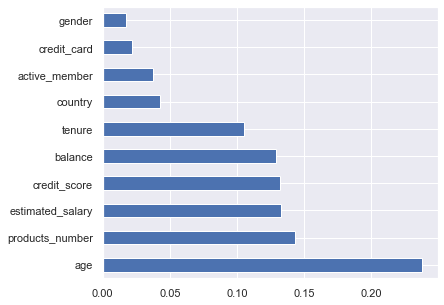

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# correlation - Heatmap - Feature Selection

In [ ]:
scaled_df_numeric = df2[['credit_score','balance','age','estimated_salary','churn']]

In [ ]:
scaled_df_numeric.head()

,credit_score,balance,age,estimated_salary,churn
0,0.538000,0.000000,0.324324,0.506735,1
1,0.516000,0.334031,0.310811,0.562709,0
2,0.304000,0.636357,0.324324,0.569654,1
3,0.698000,0.000000,0.283784,0.469120,0
4,1.000000,0.500246,0.337838,0.395400,0


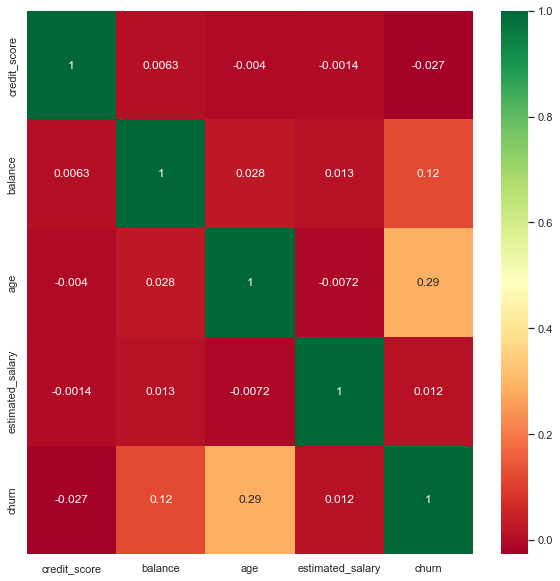

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = scaled_df_numeric.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(scaled_df_numeric[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Building Model
### Dataset is imbalanced hence need to follow oversampling or undersampling.

#### Oversampling

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

NameError: ignored

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

#### undersampling

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

# fitting the model

# RF

### with imbalanced dataset

In [ ]:
# Now will perform RandomForest Classifier

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [ ]:
model1=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=500)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[2365,   51],
       [ 347,  237]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.41      0.54       584

    accuracy                           0.87      3000
   macro avg       0.85      0.69      0.73      3000
weighted avg       0.86      0.87      0.85      3000



#### on training - to check overfitting or underfitting

In [ ]:
y_pred_train_1 = model1.predict(X_train)

In [ ]:
confusion_matrix(y_train,y_pred_train_1)

array([[5465,   82],
       [ 800,  653]], dtype=int64)

In [ ]:
print(classification_report(y_train,y_pred_train_1))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      5547
           1       0.89      0.45      0.60      1453

    accuracy                           0.87      7000
   macro avg       0.88      0.72      0.76      7000
weighted avg       0.88      0.87      0.86      7000



# RF - with balanced data - oversampling

In [ ]:
model2=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=500)
model2.fit(X_train_res,y_train_res)
y_pred2=model2.predict(X_test)

print("confusion matrix_test")
print(confusion_matrix(y_test,y_pred2))

print("classification report_test")
print(classification_report(y_test,y_pred2))


confusion matrix_test
[[1974  442]
 [ 176  408]]
classification report_test
              precision    recall  f1-score   support

           0       0.92      0.82      0.86      2416
           1       0.48      0.70      0.57       584

    accuracy                           0.79      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.83      0.79      0.81      3000



# RF - with balanced data - undersampling

In [ ]:
model3=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=500)
model3.fit(X_train_miss,y_train_miss)
y_pred3=model3.predict(X_test)

print("confusion matrix_test")
print(confusion_matrix(y_test,y_pred3))

print("classification report_test")
print(classification_report(y_test,y_pred3))

confusion matrix_test
[[1451  965]
 [ 170  414]]
classification report_test
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      2416
           1       0.30      0.71      0.42       584

    accuracy                           0.62      3000
   macro avg       0.60      0.65      0.57      3000
weighted avg       0.78      0.62      0.66      3000



### undersampling is not giving optimum results for this dataset..hence will opt for oversampling

# SVM

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [ ]:
from sklearn.svm import SVC

model4=SVC()
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)

print(confusion_matrix(y_test,y_pred4))

print(classification_report(y_test,y_pred4))

[[2416    0]
 [ 563   21]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2416
           1       1.00      0.04      0.07       584

    accuracy                           0.81      3000
   macro avg       0.91      0.52      0.48      3000
weighted avg       0.85      0.81      0.73      3000



In [ ]:
# will still more imporove our model using hyper parameter tuning
# Using GridSearchCV

from sklearn.model_selection import GridSearchCV

# defining Parameter Range
param_grid_svc={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

grid1=GridSearchCV(SVC(),param_grid_svc,refit=True,verbose=3)

# fitting the model for grid search
grid1.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   1.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   1.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   1.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   1.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.795 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.794 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   1.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.798 total time=   1.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.792 total time=   1.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.774 total time=   2.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.751 total time=   2.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.764 total time=   2.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.769 total time=   2.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.829 total time=   6.5s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.840 total time=   7.6s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.843 total time=   8.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.833 total time=   7.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.823 total time=   6.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.848 total time=   2.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.844 total time=   2.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.854 total time=   2.2s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning

print(grid1.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid1.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [ ]:
grid2=SVC(C = 1000, gamma = 0.01, kernel= 'rbf',verbose=3)
# fitting the model for grid search
grid2.fit(X_train,y_train)

[LibSVM]

SVC(C=1000, gamma=0.01, verbose=3)

In [ ]:
y_pred5=grid2.predict(X_test)

print(confusion_matrix(y_test,y_pred5))

print(classification_report(y_test,y_pred5))

[[2375   41]
 [ 371  213]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2416
           1       0.84      0.36      0.51       584

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



# SVM - balanced data

In [ ]:
grid3=SVC(C = 1000, gamma = 0.01, kernel= 'rbf',verbose=3)
# fitting the model for grid search
grid3.fit(X_train_res,y_train_res)


y_pred6=grid3.predict(X_test)

print(confusion_matrix(y_test,y_pred6))

print(classification_report(y_test,y_pred6))

[LibSVM][[1892  524]
 [ 161  423]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      2416
           1       0.45      0.72      0.55       584

    accuracy                           0.77      3000
   macro avg       0.68      0.75      0.70      3000
weighted avg       0.83      0.77      0.79      3000



## Gridsearch CV for RF and SVM on balanced dataset

In [ ]:
#RF - Gridsearch CV - balanced dataset

In [ ]:
# Now will perform RandomForest Classifier

param_grid_1 = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
rfc=RandomForestClassifier()
CV_rfc1 = GridSearchCV(estimator=rfc, param_grid=param_grid_1, cv= 5)
CV_rfc1.fit(X_train_res, y_train_res)

print(CV_rfc1.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
model7=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=200)
model7.fit(X_train_res,y_train_res)
y_pred7=model7.predict(X_test)

print(confusion_matrix(y_test,y_pred7))

print(classification_report(y_test,y_pred7))

[[1967  449]
 [ 178  406]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2416
           1       0.47      0.70      0.56       584

    accuracy                           0.79      3000
   macro avg       0.70      0.75      0.71      3000
weighted avg       0.83      0.79      0.80      3000



In [ ]:
## svm_gridsearch cv

In [ ]:
# defining Parameter Range
param_grid_svc1={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

grid4=GridSearchCV(SVC(),param_grid_svc1,refit=True,verbose=3)

# fitting the model for grid search
grid4.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   5.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.767 total time=   5.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.770 total time=   5.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.758 total time=   5.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.781 total time=   5.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.688 total time=   5.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   5.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.727 total time=   5.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.712 total time=   5.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   5.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.624 total time=   5.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.867 total time=   6.5s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.874 total time=   6.4s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.873 total time=   6.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.885 total time=   6.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.799 total time=  17.9s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.841 total time=  19.9s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.840 total time=  20.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.835 total time=  18.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.871 total time=  19.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.766 total time=   6.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.800 total time=   6.9s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.797 total time=   6.7s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning

print(grid4.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
grid4=SVC(C = 100, gamma = 1, kernel= 'rbf',verbose=3)
# fitting the model for grid search
grid4.fit(X_train_res,y_train_res)


y_pred8=grid4.predict(X_test)

print(confusion_matrix(y_test,y_pred8))

print(classification_report(y_test,y_pred8))

[LibSVM][[1968  448]
 [ 323  261]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      2416
           1       0.37      0.45      0.40       584

    accuracy                           0.74      3000
   macro avg       0.61      0.63      0.62      3000
weighted avg       0.76      0.74      0.75      3000



In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  float64
 1   balance           10000 non-null  float64
 2   age               10000 non-null  float64
 3   estimated_salary  10000 non-null  float64
 4   country           10000 non-null  int32  
 5   gender            10000 non-null  int32  
 6   tenure            10000 non-null  int64  
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  churn             10000 non-null  int64  
dtypes: float64(4), int32(2), int64(5)
memory usage: 781.4 KB


# Model based on Feature selection

### credit_card ddropped

In [ ]:
XX = df2.iloc[:,[9,2,5,1,4,7,6,3,0]]
yy = df2.iloc[:,-1]
print(XX.info())
print(yy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   active_member     10000 non-null  int64  
 1   age               10000 non-null  float64
 2   gender            10000 non-null  int32  
 3   balance           10000 non-null  float64
 4   country           10000 non-null  int32  
 5   products_number   10000 non-null  int64  
 6   tenure            10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   credit_score      10000 non-null  float64
dtypes: float64(4), int32(2), int64(3)
memory usage: 625.1 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: churn
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB
None


In [ ]:
XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size=0.30,random_state=42)

### smote

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(yy_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yy_train == 0)))

sm1 = SMOTE(random_state = 2)
XX_train_res, yy_train_res = sm1.fit_resample(XX_train, yy_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(XX_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yy_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yy_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yy_train_res == 0)))

Before OverSampling, counts of label '1': 1453
Before OverSampling, counts of label '0': 5547 

After OverSampling, the shape of train_X: (11094, 9)
After OverSampling, the shape of train_y: (11094,) 

After OverSampling, counts of label '1': 5547
After OverSampling, counts of label '0': 5547


# RF - with feature selection

In [ ]:
model9=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=500)
model9.fit(XX_train_res,yy_train_res)
y_pred9=model9.predict(XX_test)

print("confusion matrix_test")
print(confusion_matrix(yy_test,y_pred9))

print("classification report_test")
print(classification_report(yy_test,y_pred9))

confusion matrix_test
[[1981  435]
 [ 170  414]]
classification report_test
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2416
           1       0.49      0.71      0.58       584

    accuracy                           0.80      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.84      0.80      0.81      3000



In [ ]:
grid5=SVC(C = 1000, gamma = 0.01, kernel= 'rbf',verbose=3)
# fitting the model for grid search
grid5.fit(XX_train_res,yy_train_res)


y_pred10=grid5.predict(XX_test)

print(confusion_matrix(yy_test,y_pred10))

print(classification_report(yy_test,y_pred10))

[LibSVM][[1888  528]
 [ 157  427]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      2416
           1       0.45      0.73      0.55       584

    accuracy                           0.77      3000
   macro avg       0.69      0.76      0.70      3000
weighted avg       0.83      0.77      0.79      3000



### credit_score dropped

In [ ]:
#defining variables
XX = df2.iloc[:,[9,2,5,1,4,7,6,3,]]
yy = df2.iloc[:,-1]
print(XX.info())
print(yy.info())

#train-test split
XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size=0.30,random_state=42)

#smote on variables
print("Before OverSampling, counts of label '1': {}".format(sum(yy_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yy_train == 0)))

sm1 = SMOTE(random_state = 2)
XX_train_res, yy_train_res = sm1.fit_resample(XX_train, yy_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(XX_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yy_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yy_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yy_train_res == 0)))

#model - RF
model11=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=500)
model11.fit(XX_train_res,yy_train_res)
y_pred11=model11.predict(XX_test)

print("confusion matrix_test")
print(confusion_matrix(yy_test,y_pred11))

print("classification report_test")
print(classification_report(yy_test,y_pred11))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   active_member     10000 non-null  int64  
 1   age               10000 non-null  float64
 2   gender            10000 non-null  int32  
 3   balance           10000 non-null  float64
 4   country           10000 non-null  int32  
 5   products_number   10000 non-null  int64  
 6   tenure            10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
dtypes: float64(3), int32(2), int64(3)
memory usage: 547.0 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: churn
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB
None
Before OverSampling, counts of label '1': 1453
Before OverSampling, counts of label '0': 5547 

After OverSampling, the shape of train_X: (11094, 8)
After

### estimated salary dropped

In [ ]:
#defining variables
XX = df2.iloc[:,[9,2,5,1,4,7,6]]
yy = df2.iloc[:,-1]
print(XX.info())
print(yy.info())

#train-test split
XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size=0.30,random_state=42)

#smote on variables
print("Before OverSampling, counts of label '1': {}".format(sum(yy_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yy_train == 0)))

sm1 = SMOTE(random_state = 2)
XX_train_res, yy_train_res = sm1.fit_resample(XX_train, yy_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(XX_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yy_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yy_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yy_train_res == 0)))

#model - RF
model12=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=500)
model12.fit(XX_train_res,yy_train_res)
y_pred12=model12.predict(XX_test)

print("confusion matrix_test")
print(confusion_matrix(yy_test,y_pred12))

print("classification report_test")
print(classification_report(yy_test,y_pred12))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   active_member    10000 non-null  int64  
 1   age              10000 non-null  float64
 2   gender           10000 non-null  int32  
 3   balance          10000 non-null  float64
 4   country          10000 non-null  int32  
 5   products_number  10000 non-null  int64  
 6   tenure           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(3)
memory usage: 468.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: churn
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB
None
Before OverSampling, counts of label '1': 1453
Before OverSampling, counts of label '0': 5547 

After OverSampling, the shape of train_X: (11094, 7)
After OverSampling, the shape of train_y: (11094,) 

After Ov

### tenure dropped

In [ ]:
#defining variables
XX = df2.iloc[:,[9,2,5,1,4,7]]
yy = df2.iloc[:,-1]
print(XX.info())
print(yy.info())

#train-test split
XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size=0.30,random_state=42)

#smote on variables
print("Before OverSampling, counts of label '1': {}".format(sum(yy_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yy_train == 0)))

sm1 = SMOTE(random_state = 2)
XX_train_res, yy_train_res = sm1.fit_resample(XX_train, yy_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(XX_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yy_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yy_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yy_train_res == 0)))

#model - RF
model13=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=500)
model13.fit(XX_train_res,yy_train_res)
y_pred13=model13.predict(XX_test)

print("confusion matrix_test")
print(confusion_matrix(yy_test,y_pred13))

print("classification report_test")
print(classification_report(yy_test,y_pred13))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   active_member    10000 non-null  int64  
 1   age              10000 non-null  float64
 2   gender           10000 non-null  int32  
 3   balance          10000 non-null  float64
 4   country          10000 non-null  int32  
 5   products_number  10000 non-null  int64  
dtypes: float64(2), int32(2), int64(2)
memory usage: 390.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: churn
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB
None
Before OverSampling, counts of label '1': 1453
Before OverSampling, counts of label '0': 5547 

After OverSampling, the shape of train_X: (11094, 6)
After OverSampling, the shape of train_y: (11094,) 

After OverSampling, counts of label '1': 5547
After Ov

### to check overfitiing following

In [ ]:
y_pred14=model13.predict(XX_train)

print("confusion matrix_test")
print(confusion_matrix(yy_train,y_pred14))

print("classification report_test")
print(classification_report(yy_train,y_pred14))

confusion matrix_test
[[4553  994]
 [ 300 1153]]
classification report_test
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      5547
           1       0.54      0.79      0.64      1453

    accuracy                           0.82      7000
   macro avg       0.74      0.81      0.76      7000
weighted avg       0.85      0.82      0.83      7000



# Logistic Regression

In [ ]:
#defining variables
XX = df2.iloc[:,[9,2,5,1,4,7]]
yy = df2.iloc[:,-1]
print(XX.info())
print(yy.info())

#train-test split
XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size=0.30,random_state=42)

#smote on variables
print("Before OverSampling, counts of label '1': {}".format(sum(yy_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yy_train == 0)))

sm1 = SMOTE(random_state = 2)
XX_train_res, yy_train_res = sm1.fit_resample(XX_train, yy_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(XX_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yy_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yy_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yy_train_res == 0)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   active_member    10000 non-null  int64  
 1   age              10000 non-null  float64
 2   gender           10000 non-null  int32  
 3   balance          10000 non-null  float64
 4   country          10000 non-null  int32  
 5   products_number  10000 non-null  int64  
dtypes: float64(2), int32(2), int64(2)
memory usage: 390.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: churn
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB
None
Before OverSampling, counts of label '1': 1453
Before OverSampling, counts of label '0': 5547 

After OverSampling, the shape of train_X: (11094, 6)
After OverSampling, the shape of train_y: (11094,) 

After OverSampling, counts of label '1': 5547
After Ov

In [ ]:
#solver liblinear
from sklearn.linear_model import LogisticRegression
model15 = LogisticRegression(solver='liblinear', random_state=42)
model15.fit(XX_train_res,yy_train_res)
print(model15.intercept_)
print(model15.coef_)

#Predictions
y_pred15 = model15.predict(XX_test)

#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(yy_test,y_pred15)
print("\nconfusion matrix" )
print(cm)

#Classification report
from sklearn.metrics import classification_report
print("classification report")
print(classification_report(yy_test,y_pred15))


[-1.4986567]
[[-0.8377485   5.84898678 -0.53151169  1.21733376  0.09165709 -0.07833638]]

confusion matrix
[[1710  706]
 [ 179  405]]
classification report
              precision    recall  f1-score   support

           0       0.91      0.71      0.79      2416
           1       0.36      0.69      0.48       584

    accuracy                           0.70      3000
   macro avg       0.63      0.70      0.64      3000
weighted avg       0.80      0.70      0.73      3000



In [ ]:

#solver lbfgs
from sklearn.linear_model import LogisticRegression
model16 = LogisticRegression(solver='lbfgs', random_state=42)
model16.fit(XX_train_res,yy_train_res)
print(model16.intercept_)
print(model16.coef_)

#Predictions
y_pred16 = model16.predict(XX_test)

#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(yy_test,y_pred16)
print("\nconfusion matrix" )
print(cm)

#Classification report
from sklearn.metrics import classification_report
print("classification report")
print(classification_report(yy_test,y_pred16))


[-1.51012638]
[[-0.83710187  5.86198035 -0.53021958  1.2221004   0.092352   -0.07580633]]

confusion matrix
[[1710  706]
 [ 181  403]]
classification report
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.69      0.48       584

    accuracy                           0.70      3000
   macro avg       0.63      0.70      0.64      3000
weighted avg       0.80      0.70      0.73      3000



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state=42)
tree_clf.fit(XX_train_res,yy_train_res)

y_pred17 = tree_clf.predict(XX_test)

#Confusion matrix
cm = metrics.confusion_matrix(yy_test,y_pred17)
print("\nconfusion matrix" )
print(cm)

#Classification report
print("classification report")
print(classification_report(yy_test,y_pred17))


confusion matrix
[[1983  433]
 [ 212  372]]
classification report
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2416
           1       0.46      0.64      0.54       584

    accuracy                           0.79      3000
   macro avg       0.68      0.73      0.70      3000
weighted avg       0.82      0.79      0.80      3000



# XGBOOST

In [ ]:
from xgboost import XGBRegressor
# define model
model18 = XGBRegressor()
model18.fit(XX_train_res,yy_train_res)
y_pred18=model18.predict(XX_test)
print(model18.score(XX_train_res,yy_train_res)) 


0.8054236023965287


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier()

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
clf.fit(XX_train_res,yy_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.871 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.943 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.973 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.969 total time=   0.3s
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=3;, score=0.972 total time=   0.2s
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.852 total time=   0.5s
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.940 total time=   0.5s
[CV 3/5] END colsample_byt

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
clf.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [ ]:
best_model=clf.best_estimator_

In [ ]:
best_model.fit(XX_train_res,yy_train_res)

pred_xgboost = best_model.predict(XX_test)

# Confusion Matrix
cm = confusion_matrix(yy_test, pred_xgboost)
print(cm)

#Classification report
print("classification report")
print(classification_report(yy_test, pred_xgboost))

[[2237  179]
 [ 249  335]]
classification report
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2416
           1       0.65      0.57      0.61       584

    accuracy                           0.86      3000
   macro avg       0.78      0.75      0.76      3000
weighted avg       0.85      0.86      0.85      3000



In [ ]:
pred_xgboost_train = best_model.predict(XX_train_res)
# Confusion Matrix
cm = confusion_matrix(yy_train_res, pred_xgboost_train)
print(cm)

#Classification report
print("classification report")
print(classification_report(yy_train_res, pred_xgboost_train))

[[5297  250]
 [ 472 5075]]
classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      5547
           1       0.95      0.91      0.93      5547

    accuracy                           0.93     11094
   macro avg       0.94      0.93      0.93     11094
weighted avg       0.94      0.93      0.93     11094

